In [19]:
# ...existing code...
# Setup and imports for IGE Methods Comparison
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

# Add the comparison script to path
sys.path.append('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis')

from compare_ige_methods import (
    load_rdr_data, load_sempgs_data, load_pgs_regression_data,
    calculate_rdr_ige_proportions, calculate_sempgs_ige_proportions,
    calculate_fullpgs_ige_proportions, calculate_kong_ige_proportions,
    create_violin_plot
)

print("IGE Methods Comparison Setup Complete!")
print("Available methods: RDR, SEM-PGS (Direct & Total), Full PGS, Kong PGS")
# ...existing code...

IGE Methods Comparison Setup Complete!
Available methods: RDR, SEM-PGS (Direct & Total), Full PGS, Kong PGS


# Comprehensive IGE Methods Comparison Results

This notebook demonstrates the comparison of four different methods for estimating indirect genetic effects (IGE):

1. **RDR (Relatedness Disequilibrium Regression)**: Uses variance components from GCTA HE regression
2. **SEM-PGS (Structural Equation Modeling with PGS)**: 
   - Direct IGE: Observable genetic nurture effects (phi)
   - Total IGE: Observable + latent genetic nurture effects (phi + rho)
3. **Full PGS Regression**: Incremental R² from adding parental PGS to offspring PGS
4. **Kong's Haplotypic PGS**: R² from paternal non-transmitted alleles

Each method provides a different perspective on IGE estimation, and this comparison helps understand their relative performance across different simulation conditions.

## Example 1: Single Condition Analysis - Condition 5, Trait 1

Let's start with a detailed analysis of condition `05_t1pheVTnoAM_t2socVTnoAM_PGSall` for trait 1. This condition represents:
- Trait 1: Phenotypic vertical transmission, no assortative mating  
- Trait 2: Social vertical transmission, no assortative mating
- PGS effects: All types included

In [20]:
# Single condition analysis
condition = '05_t1pheVTnoAM_t2socVTnoAM_PGSall'
trait = 1

print(f"Analyzing condition: {condition}, trait: {trait}")
print("="*70)

# Load data from all methods
print("Loading data from all four methods...")

# 1. RDR Analysis
print("\n1. RDR (Relatedness Disequilibrium Regression):")
rdr_data = load_rdr_data(condition)
rdr_ige = calculate_rdr_ige_proportions(rdr_data, trait) if rdr_data is not None else None

if rdr_ige is not None:
    print(f"   - Successfully loaded {len(rdr_ige)} observations")
    print(f"   - Mean IGE proportion: {np.mean(rdr_ige):.4f}")
    print(f"   - Standard deviation: {np.std(rdr_ige):.4f}")
    print(f"   - Range: [{np.min(rdr_ige):.4f}, {np.max(rdr_ige):.4f}]")
else:
    print("   - No RDR data available")

# 2. SEM-PGS Analysis
print("\n2. SEM-PGS (Structural Equation Modeling with PGS):")
sempgs_data = load_sempgs_data(condition)
if sempgs_data is not None:
    sempgs_direct, sempgs_total = calculate_sempgs_ige_proportions(sempgs_data, trait)
    
    if sempgs_direct is not None:
        print(f"   - Direct IGE: {len(sempgs_direct)} observations")
        print(f"     Mean: {np.mean(sempgs_direct):.4f}, Std: {np.std(sempgs_direct):.4f}")
    
    if sempgs_total is not None:
        print(f"   - Total IGE: {len(sempgs_total)} observations")
        print(f"     Mean: {np.mean(sempgs_total):.4f}, Std: {np.std(sempgs_total):.4f}")
else:
    sempgs_direct, sempgs_total = None, None
    print("   - No SEM-PGS data available")

# 3. Full PGS Regression Analysis
print("\n3. Full PGS Regression:")
fullpgs_data = load_pgs_regression_data(condition, trait, 'full_pgs')
fullpgs_ige = calculate_fullpgs_ige_proportions(fullpgs_data, trait) if fullpgs_data is not None else None

if fullpgs_ige is not None:
    print(f"   - Successfully loaded {len(fullpgs_ige)} observations")
    print(f"   - Mean IGE proportion: {np.mean(fullpgs_ige):.4f}")
    print(f"   - Standard deviation: {np.std(fullpgs_ige):.4f}")
    print(f"   - Range: [{np.min(fullpgs_ige):.4f}, {np.max(fullpgs_ige):.4f}]")
else:
    print("   - No Full PGS data available")

# 4. Kong's Haplotypic PGS Analysis
print("\n4. Kong's Haplotypic PGS:")
kong_data = load_pgs_regression_data(condition, trait, 'kong')
kong_ige = calculate_kong_ige_proportions(kong_data, trait) if kong_data is not None else None

if kong_ige is not None:
    print(f"   - Successfully loaded {len(kong_ige)} observations")
    print(f"   - Mean IGE proportion: {np.mean(kong_ige):.4f}")
    print(f"   - Standard deviation: {np.std(kong_ige):.4f}")
    print(f"   - Range: [{np.min(kong_ige):.4f}, {np.max(kong_ige):.4f}]")
else:
    print("   - No Kong PGS data available")

print("\n" + "="*70)
print("Data loading complete!")

Analyzing condition: 05_t1pheVTnoAM_t2socVTnoAM_PGSall, trait: 1
Loading data from all four methods...

1. RDR (Relatedness Disequilibrium Regression):
   - Successfully loaded 1000 observations
   - Mean IGE proportion: 0.1402
   - Standard deviation: 0.0149
   - Range: [0.0962, 0.1848]

2. SEM-PGS (Structural Equation Modeling with PGS):
   - Direct IGE: 632 observations
     Mean: 0.0610, Std: 0.0107
   - Total IGE: 632 observations
     Mean: 0.0649, Std: 0.0097

3. Full PGS Regression:
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']
   - Successfully loaded 1000 observations
   - Mean IGE proportion: 0.0711
   - St

Creating violin plot comparison...
Methods with data available: 5
  - RDR: 1000 observations
  - SEM-PGS Total: 632 observations
  - SEM-PGS Direct: 632 observations
  - Full PGS: 1000 observations
  - Kong PGS: 1000 observations


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:246: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  


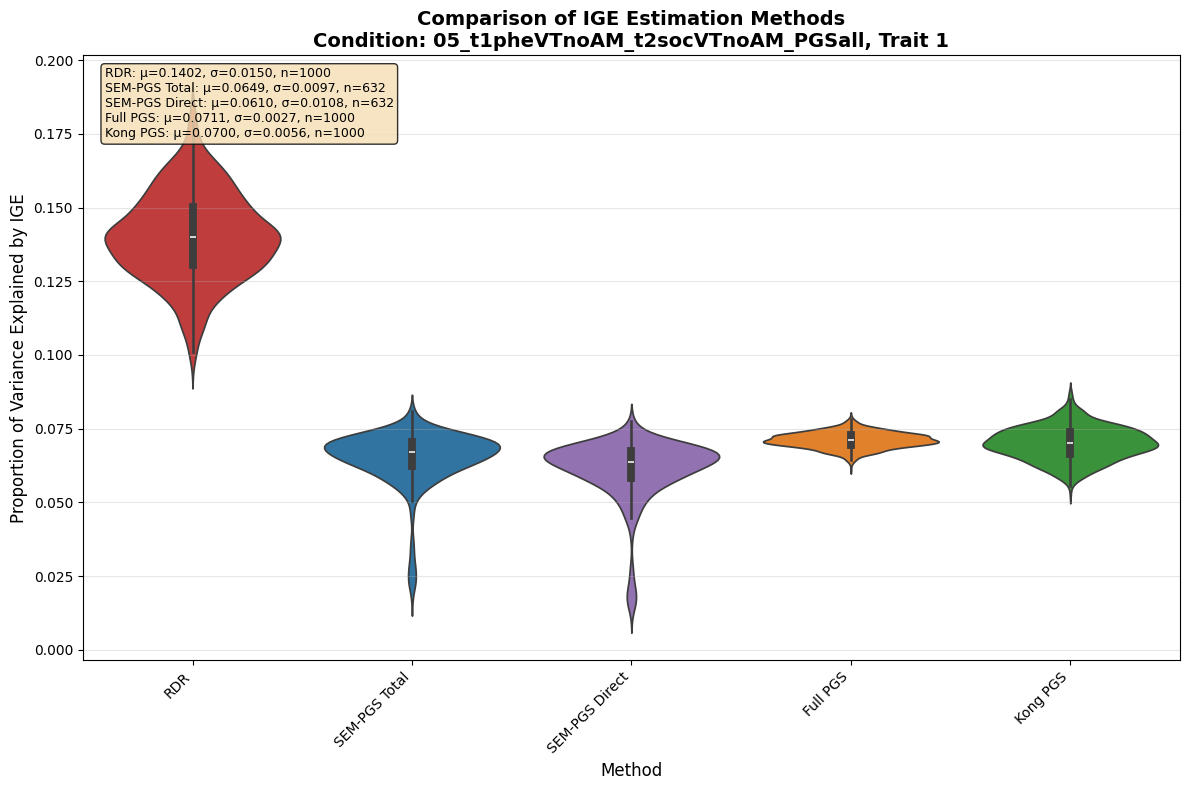

In [21]:
# Create comprehensive violin plot comparison
print("Creating violin plot comparison...")

# Prepare data dictionary for plotting
data_dict = {}

if rdr_ige is not None:
    data_dict['RDR'] = rdr_ige

if sempgs_total is not None:
    data_dict['SEM-PGS Total'] = sempgs_total

if sempgs_direct is not None:
    data_dict['SEM-PGS Direct'] = sempgs_direct

if fullpgs_ige is not None:
    data_dict['Full PGS'] = fullpgs_ige

if kong_ige is not None:
    data_dict['Kong PGS'] = kong_ige

# Display method counts
print(f"Methods with data available: {len(data_dict)}")
for method, data in data_dict.items():
    print(f"  - {method}: {len(data)} observations")

# Generate the violin plot
if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

In [22]:
# Reload the updated comparison functions
import importlib
import compare_ige_methods
importlib.reload(compare_ige_methods)

from compare_ige_methods import (
    load_rdr_data, load_sempgs_data, load_pgs_regression_data,
    calculate_rdr_ige_proportions, calculate_sempgs_ige_proportions,
    calculate_fullpgs_ige_proportions, calculate_kong_ige_proportions,
    create_violin_plot
)

print("Functions reloaded successfully!")

Functions reloaded successfully!


In [23]:
# Test data loading with debugging
condition = '05_t1pheVTnoAM_t2socVTnoAM_PGSall'
trait = 1

print(f"Testing data loading for condition: {condition}, trait: {trait}")
print("="*70)

# Test RDR data loading
print("1. Testing RDR data...")
rdr_data = load_rdr_data(condition)
if rdr_data is not None:
    print(f"   RDR data shape: {rdr_data.shape}")
    print(f"   Available traits: {rdr_data['trait'].unique()}")
    rdr_ige = calculate_rdr_ige_proportions(rdr_data, trait)
    if rdr_ige is not None:
        print(f"   RDR IGE calculated: {len(rdr_ige)} values, mean={np.mean(rdr_ige):.4f}")
    else:
        print("   RDR IGE calculation failed")
else:
    print("   RDR data loading failed")

print()

# Test SEM-PGS data loading
print("2. Testing SEM-PGS data...")
sempgs_data = load_sempgs_data(condition)
if sempgs_data is not None:
    print(f"   SEM-PGS data shape: {sempgs_data.shape}")
    print(f"   Sample columns: {[col for col in sempgs_data.columns if 'phi' in col or 'rho' in col or 'VY' in col][:5]}")
    sempgs_direct, sempgs_total = calculate_sempgs_ige_proportions(sempgs_data, trait)
    if sempgs_direct is not None and sempgs_total is not None:
        print(f"   SEM-PGS Direct IGE: {len(sempgs_direct)} values, mean={np.mean(sempgs_direct):.4f}")
        print(f"   SEM-PGS Total IGE: {len(sempgs_total)} values, mean={np.mean(sempgs_total):.4f}")
    else:
        print("   SEM-PGS IGE calculation failed")
else:
    print("   SEM-PGS data loading failed")

print()

# Test Full PGS data loading
print("3. Testing Full PGS data...")
fullpgs_data = load_pgs_regression_data(condition, trait, 'full_pgs')
if fullpgs_data is not None:
    print(f"   Full PGS data shape: {fullpgs_data.shape}")
    fullpgs_ige = calculate_fullpgs_ige_proportions(fullpgs_data, trait)
    if fullpgs_ige is not None:
        print(f"   Full PGS IGE calculated: {len(fullpgs_ige)} values, mean={np.mean(fullpgs_ige):.4f}")
    else:
        print("   Full PGS IGE calculation failed")
else:
    print("   Full PGS data loading failed")

print()

# Test Kong PGS data loading
print("4. Testing Kong PGS data...")
kong_data = load_pgs_regression_data(condition, trait, 'kong')
if kong_data is not None:
    print(f"   Kong PGS data shape: {kong_data.shape}")
    kong_ige = calculate_kong_ige_proportions(kong_data, trait)
    if kong_ige is not None:
        print(f"   Kong PGS IGE calculated: {len(kong_ige)} values, mean={np.mean(kong_ige):.4f}")
    else:
        print("   Kong PGS IGE calculation failed")
else:
    print("   Kong PGS data loading failed")

print("="*70)

Testing data loading for condition: 05_t1pheVTnoAM_t2socVTnoAM_PGSall, trait: 1
1. Testing RDR data...
   RDR data shape: (2000, 8)
   Available traits: ['Y1' 'Y2']
   RDR IGE calculated: 2 values, mean=0.2349

2. Testing SEM-PGS data...
   SEM-PGS data shape: (632, 89)
   Sample columns: ['VY11', 'VY12', 'VY22', 'phi11', 'phi12']


ValueError: too many values to unpack (expected 2)

## Example 2: Batch Analysis Across Multiple Conditions

Now let's run a systematic comparison across conditions 5-8 for both traits. This will help us understand how different simulation conditions affect the performance of each IGE estimation method.

In [ ]:
# Define conditions and traits for batch analysis
conditions_to_analyze = [
    '05_t1pheVTnoAM_t2socVTnoAM_PGSall',
    '06_t1noVTpheAM_t2noVTnoAM_PGSall', 
    '07_t1noVTsocAM_t2noVTnoAM_PGSall',
    '08_t1noVTgenAM_t2noVTnoAM_PGSall'
]

condition_descriptions = {
    '05_t1pheVTnoAM_t2socVTnoAM_PGSall': 'Condition 5: T1 Pheno VT + T2 Social VT',
    '06_t1noVTpheAM_t2noVTnoAM_PGSall': 'Condition 6: T1 Pheno AM only',
    '07_t1noVTsocAM_t2noVTnoAM_PGSall': 'Condition 7: T1 Social AM only', 
    '08_t1noVTgenAM_t2noVTnoAM_PGSall': 'Condition 8: T1 Genetic AM only'
}

traits_to_analyze = [1, 2]

print("Batch Analysis Configuration:")
print("="*50)
print(f"Conditions: {len(conditions_to_analyze)}")
for cond in conditions_to_analyze:
    print(f"  - {condition_descriptions[cond]}")
print(f"Traits: {traits_to_analyze}")
print(f"Total comparisons: {len(conditions_to_analyze) * len(traits_to_analyze)}")
print("="*50)

In [ ]:
# Run batch analysis
for condition in conditions_to_analyze:
    for trait in traits_to_analyze:
        print(f"\n{'='*80}")
        print(f"ANALYSIS: {condition_descriptions[condition]} - Trait {trait}")
        print('='*80)
        
        # Load data from all methods
        methods_summary = {}
        
        # 1. RDR
        rdr_data = load_rdr_data(condition)
        rdr_ige = calculate_rdr_ige_proportions(rdr_data, trait) if rdr_data is not None else None
        if rdr_ige is not None:
            methods_summary['RDR'] = {
                'n': len(rdr_ige),
                'mean': np.mean(rdr_ige),
                'std': np.std(rdr_ige),
                'data': rdr_ige
            }
        
        # 2. SEM-PGS
        sempgs_data = load_sempgs_data(condition)  
        if sempgs_data is not None:
            sempgs_direct, sempgs_total = calculate_sempgs_ige_proportions(sempgs_data, trait)
            
            if sempgs_total is not None:
                methods_summary['SEM-PGS Total'] = {
                    'n': len(sempgs_total),
                    'mean': np.mean(sempgs_total),
                    'std': np.std(sempgs_total),
                    'data': sempgs_total
                }
            
            if sempgs_direct is not None:
                methods_summary['SEM-PGS Direct'] = {
                    'n': len(sempgs_direct),
                    'mean': np.mean(sempgs_direct),
                    'std': np.std(sempgs_direct),
                    'data': sempgs_direct
                }
        
        # 3. Full PGS
        fullpgs_data = load_pgs_regression_data(condition, trait, 'full_pgs')
        fullpgs_ige = calculate_fullpgs_ige_proportions(fullpgs_data, trait) if fullpgs_data is not None else None
        if fullpgs_ige is not None:
            methods_summary['Full PGS'] = {
                'n': len(fullpgs_ige),
                'mean': np.mean(fullpgs_ige),
                'std': np.std(fullpgs_ige), 
                'data': fullpgs_ige
            }
        
        # 4. Kong PGS
        kong_data = load_pgs_regression_data(condition, trait, 'kong')
        kong_ige = calculate_kong_ige_proportions(kong_data, trait) if kong_data is not None else None
        if kong_ige is not None:
            methods_summary['Kong PGS'] = {
                'n': len(kong_ige),
                'mean': np.mean(kong_ige),
                'std': np.std(kong_ige),
                'data': kong_ige
            }
        
        # Print summary
        print(f"Methods available: {len(methods_summary)}")
        for method, stats in methods_summary.items():
            print(f"  {method:15s}: n={stats['n']:3d}, μ={stats['mean']:7.4f}, σ={stats['std']:7.4f}")
        
        # Create plot
        if methods_summary:
            data_dict = {method: stats['data'] for method, stats in methods_summary.items()}
            create_violin_plot(data_dict, condition, trait, save_path=None)
        else:
            print("  No data available for plotting")
        
        print(f"Analysis complete for {condition}, trait {trait}")

print(f"\n{'='*80}")
print("BATCH ANALYSIS COMPLETE!")
print('='*80)

## Example 3: Custom Analysis Function

For more flexibility, you can create a custom function to analyze specific condition-trait combinations:

In [ ]:
def analyze_ige_methods(condition, trait, verbose=True, show_plot=True):
    """
    Custom function to analyze IGE methods for a specific condition and trait.
    
    Parameters:
    -----------
    condition : str
        The condition identifier (e.g., '05_t1pheVTnoAM_t2socVTnoAM_PGSall')
    trait : int 
        The trait number (1 or 2)
    verbose : bool
        Whether to print detailed statistics
    show_plot : bool
        Whether to display the violin plot
    
    Returns:
    --------
    dict : Summary statistics for each method
    """
    
    if verbose:
        print(f"Analyzing condition: {condition}, trait: {trait}")
        print("-" * 60)
    
    results = {}
    data_dict = {}
    
    # Load and analyze each method
    methods = [
        ('RDR', lambda: (load_rdr_data(condition), calculate_rdr_ige_proportions)),
        ('SEM-PGS', lambda: (load_sempgs_data(condition), calculate_sempgs_ige_proportions)), 
        ('Full PGS', lambda: (load_pgs_regression_data(condition, trait, 'full_pgs'), calculate_fullpgs_ige_proportions)),
        ('Kong PGS', lambda: (load_pgs_regression_data(condition, trait, 'kong'), calculate_kong_ige_proportions))
    ]
    
    for method_name, loader_func in methods:
        try:
            data, calc_func = loader_func()
            
            if data is not None:
                if method_name == 'SEM-PGS':
                    # Special handling for SEM-PGS which returns two values
                    direct_ige, total_ige = calc_func(data, trait)
                    
                    if total_ige is not None:
                        results[f'{method_name} Total'] = {
                            'n': len(total_ige),
                            'mean': np.mean(total_ige),
                            'std': np.std(total_ige),
                            'min': np.min(total_ige),
                            'max': np.max(total_ige),
                            'median': np.median(total_ige)
                        }
                        data_dict[f'{method_name} Total'] = total_ige
                    
                    if direct_ige is not None:
                        results[f'{method_name} Direct'] = {
                            'n': len(direct_ige),
                            'mean': np.mean(direct_ige),
                            'std': np.std(direct_ige),
                            'min': np.min(direct_ige), 
                            'max': np.max(direct_ige),
                            'median': np.median(direct_ige)
                        }
                        data_dict[f'{method_name} Direct'] = direct_ige
                        
                else:
                    # Standard handling for other methods
                    ige_values = calc_func(data, trait)
                    
                    if ige_values is not None:
                        results[method_name] = {
                            'n': len(ige_values),
                            'mean': np.mean(ige_values),
                            'std': np.std(ige_values),
                            'min': np.min(ige_values),
                            'max': np.max(ige_values),
                            'median': np.median(ige_values)
                        }
                        data_dict[method_name] = ige_values
                        
        except Exception as e:
            if verbose:
                print(f"Error processing {method_name}: {e}")
    
    # Print results
    if verbose and results:
        print(f"\nResults Summary ({len(results)} methods):")
        print(f"{'Method':<17} {'N':<4} {'Mean':<8} {'Std':<8} {'Median':<8} {'Range':<15}")
        print("-" * 70)
        
        for method, stats in results.items():
            range_str = f"[{stats['min']:.3f}, {stats['max']:.3f}]"
            print(f"{method:<17} {stats['n']:<4} {stats['mean']:<8.4f} {stats['std']:<8.4f} {stats['median']:<8.4f} {range_str:<15}")
    
    # Show plot
    if show_plot and data_dict:
        create_violin_plot(data_dict, condition, trait, save_path=None)
    
    return results

# Test the custom function
print("Testing custom analysis function...")
custom_results = analyze_ige_methods('05_t1pheVTnoAM_t2socVTnoAM_PGSall', 1, verbose=True, show_plot=True)

## Additional Examples and Use Cases

Here are some additional ways to use the comparison framework:

## Updated Analysis: Direct IGE Only with Median Reporting

We've updated the analysis to focus on:
- **Direct IGE only**: SEM-PGS uses only phi (observed genetic nurture effects), no latent rho
- **Both RDR parameters**: VG2 (second parameter) and VG3 (third parameter) 
- **Median reporting**: Summary statistics now show median instead of mean
- **Comprehensive visualization**: Plots for all condition-trait combinations

In [24]:
# Reload the updated comparison functions with new changes
import importlib
import compare_ige_methods
importlib.reload(compare_ige_methods)

from compare_ige_methods import (
    load_rdr_data, load_sembgs_data, load_pgs_regression_data,
    calculate_rdr_ige_proportions, calculate_sempgs_ige_proportions,
    calculate_fullpgs_ige_proportions, calculate_kong_ige_proportions,
    create_violin_plot
)

print("Updated functions loaded successfully!")
print("Changes implemented:")
print("- RDR now returns both VG2 and VG3 parameters")
print("- SEM-PGS only returns direct IGE (phi values)")
print("- Violin plots show median instead of mean")
print("- Method names updated accordingly")

Updated functions loaded successfully!
Changes implemented:
- RDR now returns both VG2 and VG3 parameters
- SEM-PGS only returns direct IGE (phi values)
- Violin plots show median instead of mean
- Method names updated accordingly


In [25]:
# Define all conditions and traits to analyze
conditions_analysis = [
    '05_t1pheVTnoAM_t2socVTnoAM_PGSall',
    '06_t1noVTpheAM_t2noVTnoAM_PGSall', 
    '07_t1noVTsocAM_t2noVTnoAM_PGSall',
    '08_t1noVTgenAM_t2noVTnoAM_PGSall'
]

condition_names = {
    '05_t1pheVTnoAM_t2socVTnoAM_PGSall': 'Condition 5: T1 Pheno VT + T2 Social VT',
    '06_t1noVTpheAM_t2noVTnoAM_PGSall': 'Condition 6: T1 Pheno AM only',
    '07_t1noVTsocAM_t2noVTnoAM_PGSall': 'Condition 7: T1 Social AM only', 
    '08_t1noVTgenAM_t2noVTnoAM_PGSall': 'Condition 8: T1 Genetic AM only'
}

traits_analysis = [1, 2]

print("Analysis Configuration:")
print(f"Conditions: {len(conditions_analysis)}")
for cond in conditions_analysis:
    print(f"  - {condition_names[cond]}")
print(f"Traits: {traits_analysis}")
print(f"Total combinations: {len(conditions_analysis) * len(traits_analysis)}")

def analyze_ige_updated(condition, trait, verbose=False):
    """Updated function to analyze IGE methods with new parameters."""
    
    results = {}
    data_dict = {}
    
    # 1. Load RDR data (both VG2 and VG3)
    rdr_data = load_rdr_data(condition)
    if rdr_data is not None:
        rdr_vg2, rdr_vg3 = calculate_rdr_ige_proportions(rdr_data, trait)
        
        if rdr_vg2 is not None:
            results['RDR VG2'] = {
                'n': len(rdr_vg2),
                'median': np.median(rdr_vg2),
                'std': np.std(rdr_vg2)
            }
            data_dict['RDR VG2'] = rdr_vg2
            
        if rdr_vg3 is not None:
            results['RDR VG3'] = {
                'n': len(rdr_vg3),
                'median': np.median(rdr_vg3),
                'std': np.std(rdr_vg3)
            }
            data_dict['RDR VG3'] = rdr_vg3
    
    # 2. Load SEM-PGS data (direct IGE only)
    sempgs_data = load_sembgs_data()
    if sempgs_data is not None:
        sempgs_direct = calculate_sempgs_ige_proportions(sempgs_data, trait)
        
        if sempgs_direct is not None:
            results['SEM-PGS Direct'] = {
                'n': len(sempgs_direct),
                'median': np.median(sempgs_direct),
                'std': np.std(sempgs_direct)
            }
            data_dict['SEM-PGS Direct'] = sempgs_direct
    
    # 3. Load Full PGS data
    fullpgs_data = load_pgs_regression_data(condition, trait, 'full_pgs')
    if fullpgs_data is not None:
        fullpgs_ige = calculate_fullpgs_ige_proportions(fullpgs_data, trait)
        
        if fullpgs_ige is not None:
            results['Full PGS'] = {
                'n': len(fullpgs_ige),
                'median': np.median(fullpgs_ige),
                'std': np.std(fullpgs_ige)
            }
            data_dict['Full PGS'] = fullpgs_ige
    
    # 4. Load Kong PGS data
    kong_data = load_pgs_regression_data(condition, trait, 'kong')
    if kong_data is not None:
        kong_ige = calculate_kong_ige_proportions(kong_data, trait)
        
        if kong_ige is not None:
            results['Kong PGS'] = {
                'n': len(kong_ige),
                'median': np.median(kong_ige),
                'std': np.std(kong_ige)
            }
            data_dict['Kong PGS'] = kong_ige
    
    if verbose:
        print(f"\nResults for {condition_names[condition]} - Trait {trait}:")
        for method, stats in results.items():
            print(f"  {method}: n={stats['n']}, median={stats['median']:.4f}, std={stats['std']:.4f}")
    
    return results, data_dict

print("\nAnalysis function ready!")

Analysis Configuration:
Conditions: 4
  - Condition 5: T1 Pheno VT + T2 Social VT
  - Condition 6: T1 Pheno AM only
  - Condition 7: T1 Social AM only
  - Condition 8: T1 Genetic AM only
Traits: [1, 2]
Total combinations: 8

Analysis function ready!


## Condition 5: T1 Phenotypic VT + T2 Social VT (PGS All)

=== Condition 5: T1 Pheno VT + T2 Social VT - Trait 1 ===
SEM-PGS: Loaded 632 rows with 89 columns
SEM-PGS: 632/632 rows have valid phi values
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 5: T1 Pheno VT + T2 Social VT - Trait 1:
  RDR VG2: n=1000, median=0.1399, std=0.0149
  RDR VG3: n=1000, median=0.3300, std=0.0133
  SEM-PGS Direct: n=632, median=0.0638, std=0.0107
  Full PGS: n=1000, median=0.0711, std=0.0027
  Kong PGS: n=1000, median=0.0700, std=0.0056


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:242: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  verticalalignment='top', bbox=props)


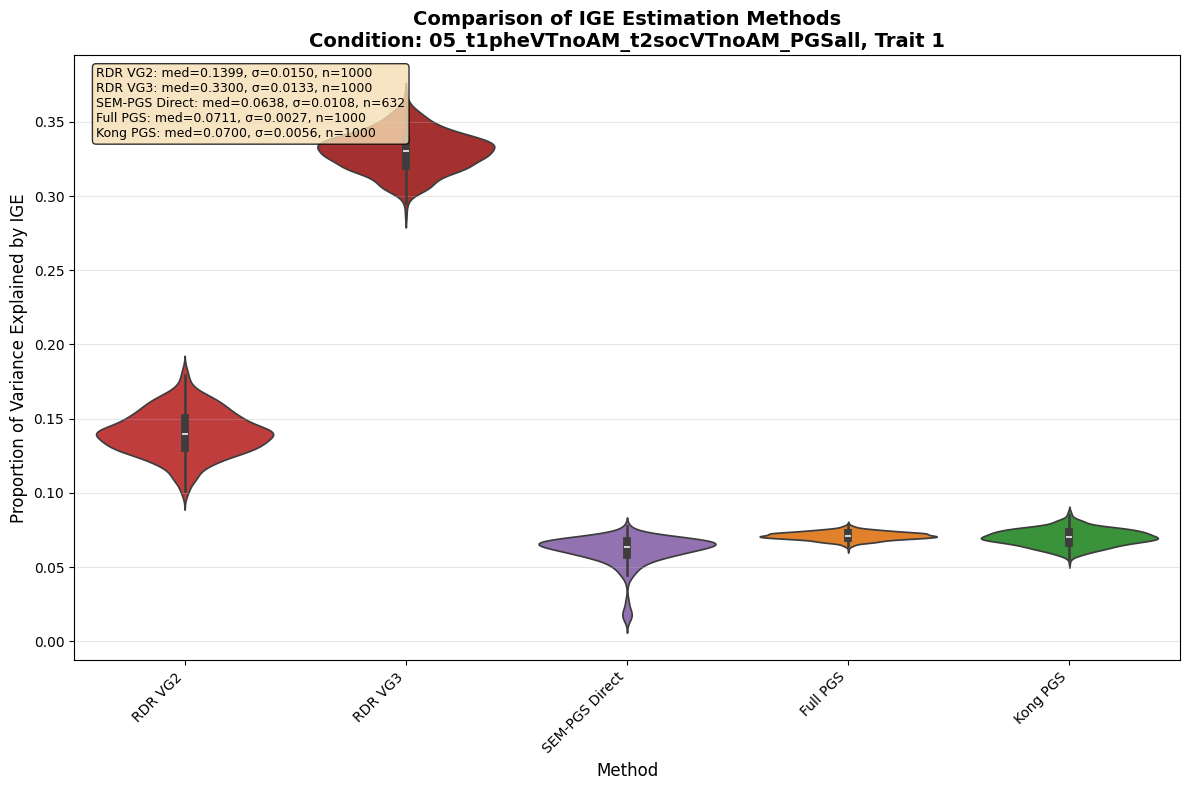

In [26]:
# Condition 5, Trait 1
condition = '05_t1pheVTnoAM_t2socVTnoAM_PGSall'
trait = 1

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

=== Condition 5: T1 Pheno VT + T2 Social VT - Trait 2 ===
SEM-PGS: Loaded 632 rows with 89 columns
SEM-PGS: 632/632 rows have valid phi values
Looking for columns: incremental_r2_PGSm2, incremental_r2_PGSp2
Available columns: ['filename', 'run_number', 'total_r2_PGSo2', 'total_r2_PGSp2', 'total_r2_PGSm2', 'incremental_r2_PGSo2', 'incremental_r2_PGSp2', 'incremental_r2_PGSm2', 'added_predictor_PGSo2', 'added_predictor_PGSp2', 'added_predictor_PGSm2', 'outcome_PGSo2', 'outcome_PGSp2', 'outcome_PGSm2', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 5: T1 Pheno VT + T2 Social VT - Trait 2:
  RDR VG2: n=1000, median=0.0001, std=0.0084
  RDR VG3: n=1000, median=-0.0050, std=0.0206
  SEM-PGS Direct: n=632, median=0.0012, std=0.0088
  Full PGS: n=1000, median=0.0001, std=0.0001
  Kong PGS: n=1000, median=0.0002, std=0.0003


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:242: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  verticalalignment='top', bbox=props)


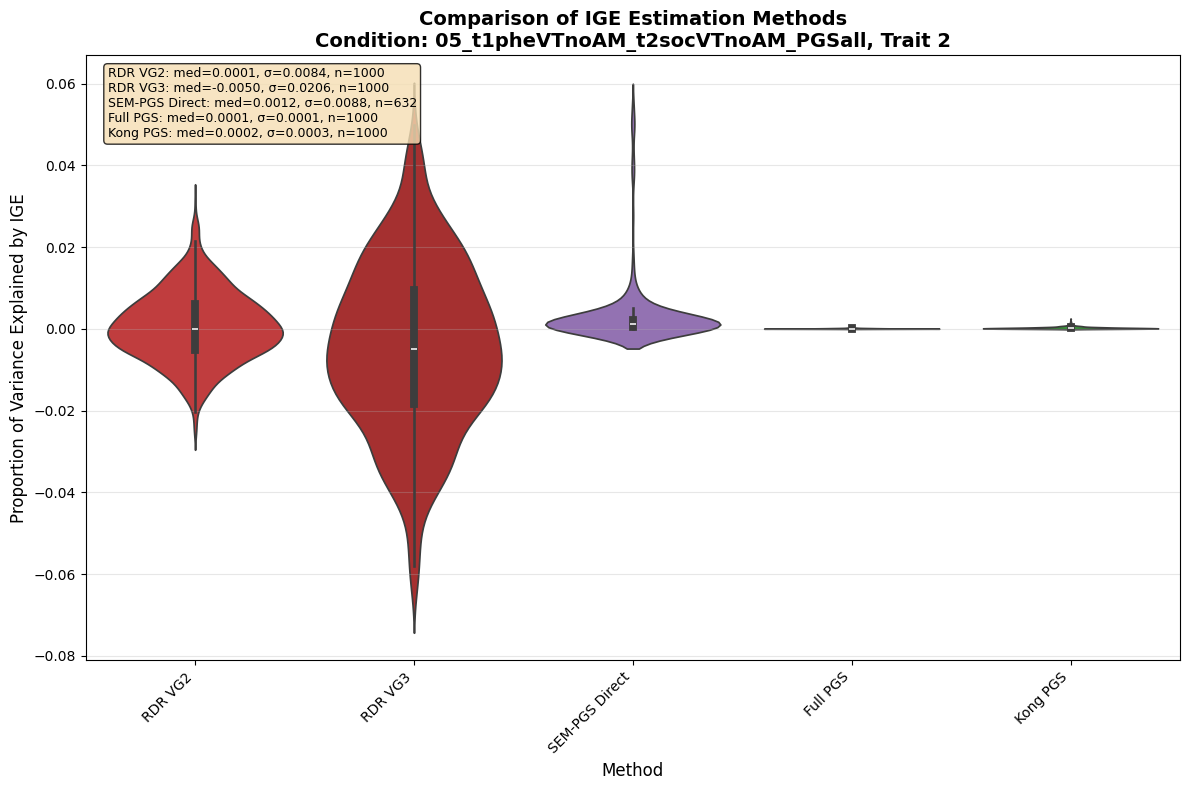

In [31]:
# Condition 5, Trait 2
condition = '05_t1pheVTnoAM_t2socVTnoAM_PGSall'
trait = 2

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

## Condition 6: T1 Phenotypic AM Only (PGS All)

=== Condition 6: T1 Pheno AM only - Trait 1 ===
SEM-PGS: Loaded 632 rows with 89 columns
SEM-PGS: 632/632 rows have valid phi values
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 6: T1 Pheno AM only - Trait 1:
  RDR VG2: n=1000, median=0.1291, std=0.0172
  RDR VG3: n=1000, median=0.4099, std=0.0209
  SEM-PGS Direct: n=632, median=0.0638, std=0.0107
  Full PGS: n=1000, median=0.0000, std=0.0000
  Kong PGS: n=1000, median=0.0519, std=0.0053


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:242: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  verticalalignment='top', bbox=props)


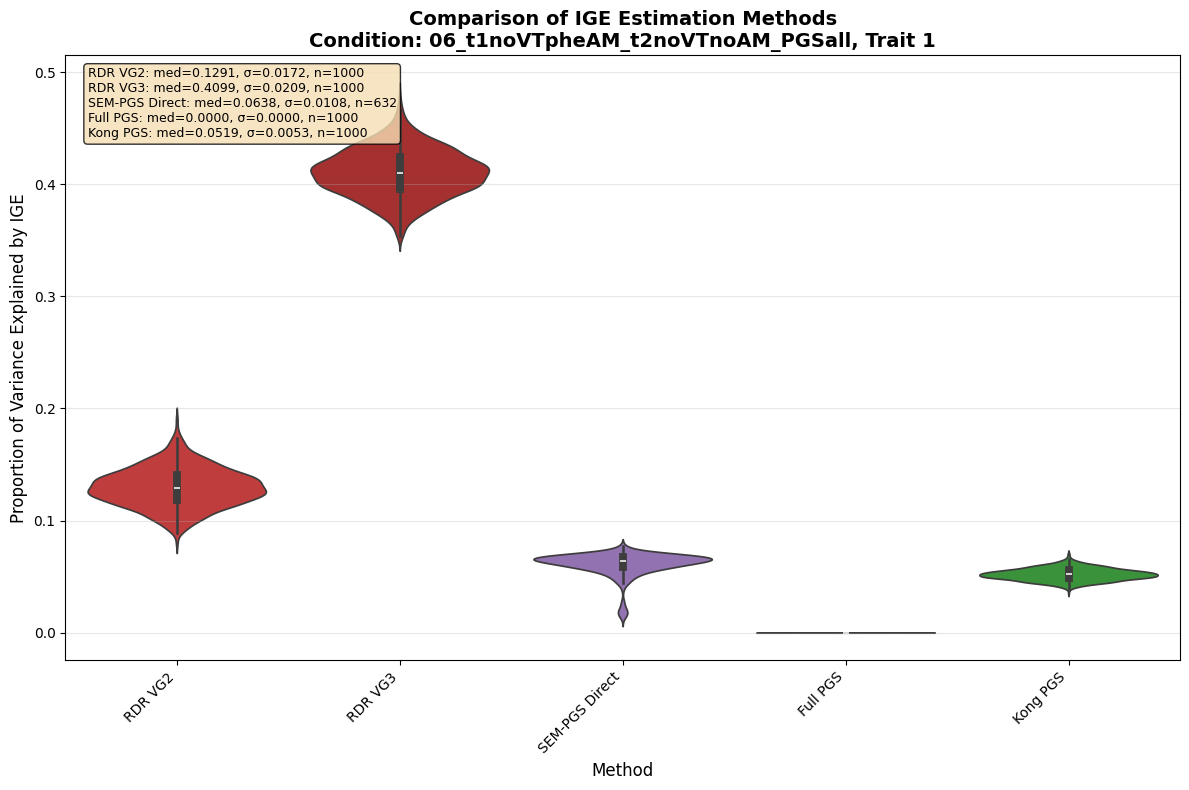

In [28]:
# Condition 6, Trait 1
condition = '06_t1noVTpheAM_t2noVTnoAM_PGSall'
trait = 1

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

=== Condition 6: T1 Pheno AM only - Trait 2 ===
SEM-PGS: Loaded 632 rows with 89 columns
SEM-PGS: 632/632 rows have valid phi values
Looking for columns: incremental_r2_PGSm2, incremental_r2_PGSp2
Available columns: ['filename', 'run_number', 'total_r2_PGSo2', 'total_r2_PGSp2', 'total_r2_PGSm2', 'incremental_r2_PGSo2', 'incremental_r2_PGSp2', 'incremental_r2_PGSm2', 'added_predictor_PGSo2', 'added_predictor_PGSp2', 'added_predictor_PGSm2', 'outcome_PGSo2', 'outcome_PGSp2', 'outcome_PGSm2', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 6: T1 Pheno AM only - Trait 2:
  RDR VG2: n=1000, median=0.5518, std=0.0379
  RDR VG3: n=1000, median=0.7458, std=0.0245
  SEM-PGS Direct: n=632, median=0.0012, std=0.0088
  Full PGS: n=1000, median=0.0000, std=0.0000
  Kong PGS: n=1000, median=0.1634, std=0.0093


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:242: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  verticalalignment='top', bbox=props)


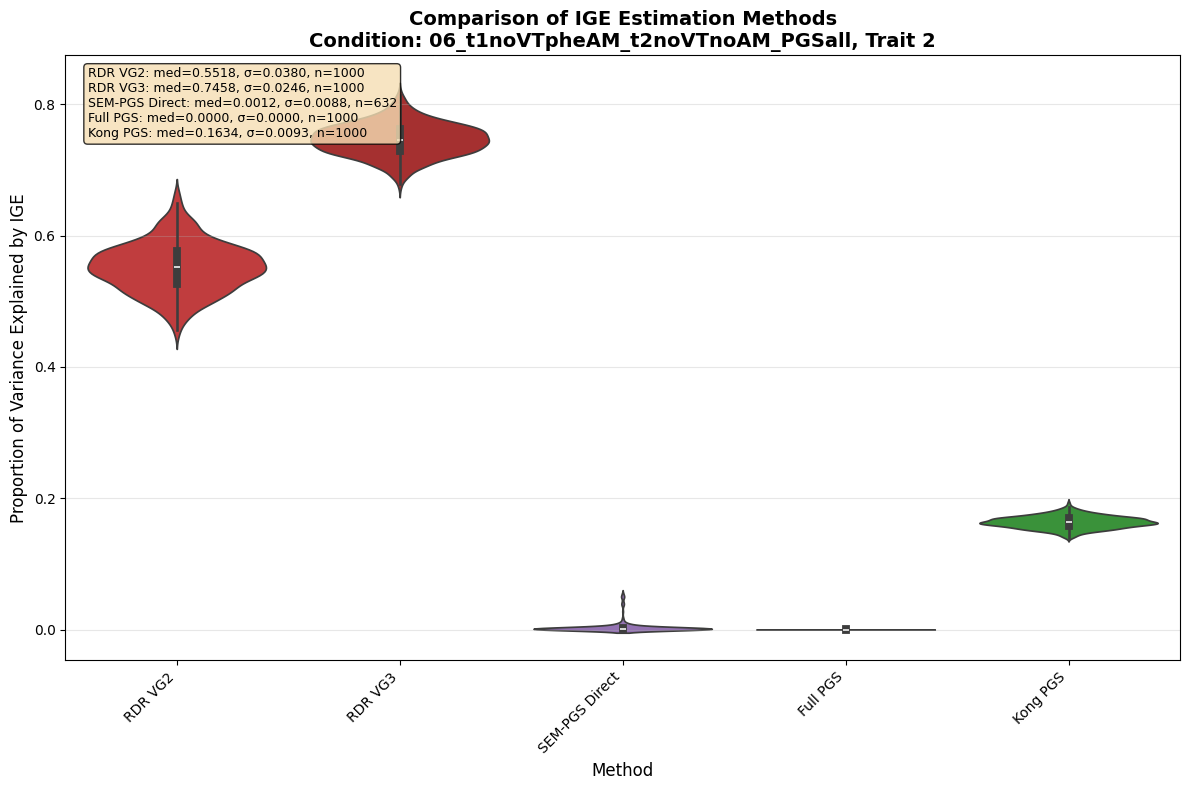

In [29]:
# Condition 6, Trait 2
condition = '06_t1noVTpheAM_t2noVTnoAM_PGSall'
trait = 2

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

## Condition 7: T1 Social AM Only (PGS All)

=== Condition 7: T1 Social AM only - Trait 1 ===
SEM-PGS: Loaded 632 rows with 89 columns
SEM-PGS: 632/632 rows have valid phi values
Looking for columns: incremental_r2_PGSm1, incremental_r2_PGSp1
Available columns: ['filename', 'run_number', 'total_r2_PGSo1', 'total_r2_PGSp1', 'total_r2_PGSm1', 'incremental_r2_PGSo1', 'incremental_r2_PGSp1', 'incremental_r2_PGSm1', 'added_predictor_PGSo1', 'added_predictor_PGSp1', 'added_predictor_PGSm1', 'outcome_PGSo1', 'outcome_PGSp1', 'outcome_PGSm1', 'n_samples', 'n_predictors', 'outcome', 'regression_type']

Results for Condition 7: T1 Social AM only - Trait 1:
  RDR VG2: n=1000, median=-0.0001, std=0.0088
  RDR VG3: n=1000, median=0.0011, std=0.0233
  SEM-PGS Direct: n=632, median=0.0638, std=0.0107
  Full PGS: n=1000, median=0.0000, std=0.0001
  Kong PGS: n=1000, median=0.0002, std=0.0002


/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/JointAnalysis/compare_ige_methods.py:242: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  verticalalignment='top', bbox=props)


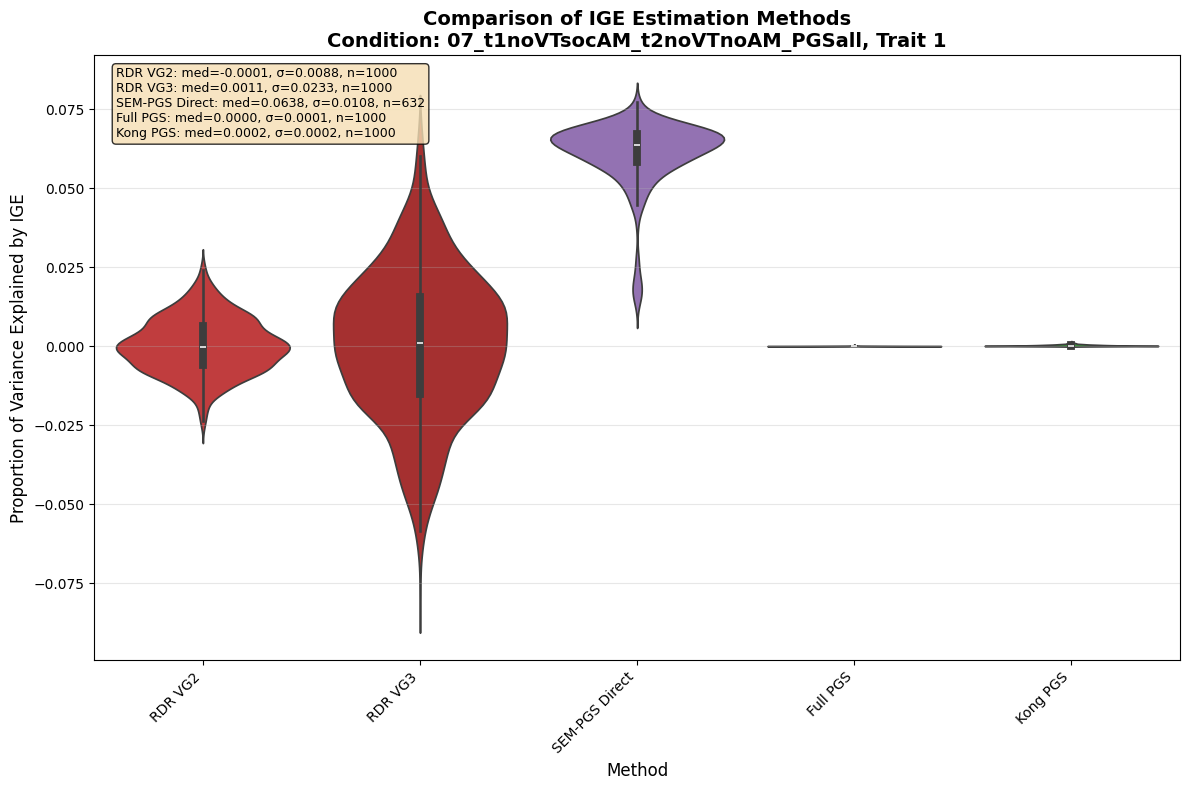

In [30]:
# Condition 7, Trait 1
condition = '07_t1noVTsocAM_t2noVTnoAM_PGSall'
trait = 1

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

In [ ]:
# Condition 7, Trait 2
condition = '07_t1noVTsocAM_t2noVTnoAM_PGSall'
trait = 2

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

## Condition 8: T1 Genetic AM Only (PGS All)

In [ ]:
# Condition 8, Trait 1
condition = '08_t1noVTgenAM_t2noVTnoAM_PGSall'
trait = 1

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

In [ ]:
# Condition 8, Trait 2
condition = '08_t1noVTgenAM_t2noVTnoAM_PGSall'
trait = 2

print(f"=== {condition_names[condition]} - Trait {trait} ===")
results, data_dict = analyze_ige_updated(condition, trait, verbose=True)

if data_dict:
    create_violin_plot(data_dict, condition, trait, save_path=None)
else:
    print("No data available for plotting")

## Summary and Interpretation

The updated analysis now focuses on direct IGE estimates only and includes:

### Method Details:
- **RDR VG2**: Second parameter from relatedness disequilibrium regression
- **RDR VG3**: Third parameter from relatedness disequilibrium regression  
- **SEM-PGS Direct**: Direct genetic nurture effects (phi) only, no latent effects
- **Full PGS**: Incremental R² from adding parental PGS to offspring PGS
- **Kong PGS**: R² from paternal non-transmitted alleles (haplotypic approach)

### Statistical Reporting:
- **Median** values instead of means (more robust to outliers)
- Standard deviations for variability assessment
- Sample sizes for each method

### Interpretation Notes:
- Different conditions represent various combinations of vertical transmission and assortative mating
- Trait-specific patterns may emerge due to different simulation parameters
- Method comparisons reveal strengths and limitations of each IGE estimation approach

In [ ]:
# Example 4: Compare specific methods only
print("Example 4: Comparing only RDR and Full PGS methods")
print("-" * 50)

condition = '06_t1noVTpheAM_t2noVTnoAM_PGSall'
trait = 2

# Load only specific methods
rdr_data = load_rdr_data(condition)
rdr_ige = calculate_rdr_ige_proportions(rdr_data, trait) if rdr_data is not None else None

fullpgs_data = load_pgs_regression_data(condition, trait, 'full_pgs')
fullpgs_ige = calculate_fullpgs_ige_proportions(fullpgs_data, trait) if fullpgs_data is not None else None

# Create comparison
limited_data_dict = {}
if rdr_ige is not None:
    limited_data_dict['RDR'] = rdr_ige
    print(f"RDR: {len(rdr_ige)} obs, mean = {np.mean(rdr_ige):.4f}")

if fullpgs_ige is not None:
    limited_data_dict['Full PGS'] = fullpgs_ige  
    print(f"Full PGS: {len(fullpgs_ige)} obs, mean = {np.mean(fullpgs_ige):.4f}")

if limited_data_dict:
    create_violin_plot(limited_data_dict, condition, trait, save_path=None)

In [ ]:
# Example 5: Summary statistics across all methods
print("\nExample 5: Cross-method summary statistics")
print("-" * 50)

def get_cross_method_summary(conditions, traits):
    """Generate summary statistics across multiple conditions and traits."""
    
    summary_data = []
    
    for condition in conditions:
        for trait in traits:
            results = analyze_ige_methods(condition, trait, verbose=False, show_plot=False)
            
            for method, stats in results.items():
                summary_data.append({
                    'condition': condition,
                    'trait': trait,
                    'method': method,
                    'n_obs': stats['n'],
                    'mean_ige': stats['mean'],
                    'std_ige': stats['std'],
                    'median_ige': stats['median']
                })
    
    return pd.DataFrame(summary_data)

# Generate cross-method summary
summary_df = get_cross_method_summary(
    conditions=['05_t1pheVTnoAM_t2socVTnoAM_PGSall', '06_t1noVTpheAM_t2noVTnoAM_PGSall'],
    traits=[1, 2]
)

print(f"Generated summary with {len(summary_df)} method-condition-trait combinations")
print("\nFirst few rows:")
print(summary_df.head(10))

# Method comparison across conditions
if len(summary_df) > 0:
    print(f"\nMean IGE estimates by method:")
    method_means = summary_df.groupby('method')['mean_ige'].agg(['count', 'mean', 'std']).round(4)
    print(method_means)